# Fetal Health Classification.

## Step 1 : Import necessary libraries and warnings

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
set_config(print_changed_only=False)
from xgboost import XGBClassifier
#from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
pd.set_option('display.max_columns', 300)
% matplotlib inline
plt.style.use('seaborn')


In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 2 : Reading and Understanding the dataset.

In [8]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fetal_health (1).csv")

In [9]:
#  Displaying top 5 records from "fetal_health.csv" dataset. 
data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0

In [10]:
# Displaying last 5 records from "fatal_health.csv" dataset.
data.tail()

baseline value  accelerations  fetal_movement  uterine_contractions  \
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
2121                  0.0                   0.0                       0.0   
2122                  0.0                   0.0                       0.0   
2123                  0.0                   0.0                       0.0   
2124                  0.0                   0.0                       0.0   
2125                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  \
2121                                               25.0        
2122                                               22.0        
2123                                               20.0        
2124                                               27.0        
2125                                               36.0        

      mean_value_of_long_term_variability  histogram_width  histogram_min  \
2121                                  7.2             40.0          137.0   
2122                                  7.1             66.0          103.0   
2123                                  6.1             67.0          103.0   
2124                                  7.0             66.0          103.0   
2125                                  5.0             42.0          117.0   

      histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
2121          177.0                        4.0                         0.0   
2122          169.0                        6.0                         0.0   
2123          170.0                        5.0                         0.0   
2124          169.0                        6.0                         0.0   
2125          159.0                        2.0                         1.0   

      histogram_mode  histogram_mean  histogram_median  histogram_variance  \
2121           153.0           150.0             152.0                 2.0   
2122           152.0           148.0             151.0                 3.0   
2123           153.0           148.0             152.0                 4.0   
2124           152.0           147.0             151.0                 4.0   
2125           145.0           143.0             145.0                 1.0   

      histogram_tendency  fetal_health  
2121                 0.0           2.0  
2122                 1.0           2.0  
2123                 1.0           2.0  
2124                 1.0           2.0  
2125                 0.0           1.0

In [11]:
# Determining the shape of data.
data.shape

(2126, 22)

#### This dataset contains 2126 rows and 22 columns.

In [12]:
# Describe the data.
data.describe(include = "all")

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  \
count                                         2126.00000        
mean                                             9.84666        
std                                             18.39688        
min                                              0.00000        
25%                                              0.00000        
50%                                              0.00000        
75%                                             11.00000        
max                                             91.00000        

       mean_value_of_long_term_variability  histogram_width  histogram_min  \
count                          2126.000000      2126.000000    2126.000000   
mean                              8.187629        70.445908      93.579492   
std                               5.628247        38.955693      29.560212   
min                               0.000000         3.000000      50.000000   
25%                               4.600000        37.000000      67.000000   
50%                               7.400000        67.500000      93.000000   
75%                              10.800000       100.000000     120.000000   
max                              50.700000       180.000000     159.000000   

       histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
count    2126.000000                2126.000000                 2126.000000   
mean      164.025400                   4.068203                    0.323612   
std        17.944183                   2.949386                    0.706059   
min       122.000000                   0.000000                    0.000000   
25%       152.000000                   2.000000                    0.000000   
50%       162.000000                   3.000000                    0.000000   
75%       174.000000                  

#### The above snippet gave the statistical/mathematical display of dataset. 

In [13]:
# Understanding the data by checking the datatype of each column.
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

##### We have all columns data in "float64" format ie. all continues variables. So we dont have to worry about data type conversion.

## Step 3 : Data Cleaning.

##### Drop columns that are having high percentage of missing values. Check all the columns before dropping them and then impute values in columns which are important.

In [14]:
# Define a function for getting missing values.

def getMissingValues(missingCutoff):
    missing = round(100*(data.isnull().sum()/data.shape[0]))
    print("There are {} features having more than {}% missing values".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [15]:
# Call the missing values function by passing the threshold value.
getMissingValues(10)

There are 0 features having more than 10% missing values


Series([], dtype: float64)

This dataset dont have any missing values So, we dont have to impute values.

In [16]:
# See the different values present in "fetal_health" variable.

data.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

#####Here we have three classes as : 
#####1. Normal
#####2. Suspect
#####3. Pathological

## Step 4 : Exploratory Data Analysis (EDA)

Now we want to take the indepth look at dataset.
we will look at target variable and the relationship of other features with each other.

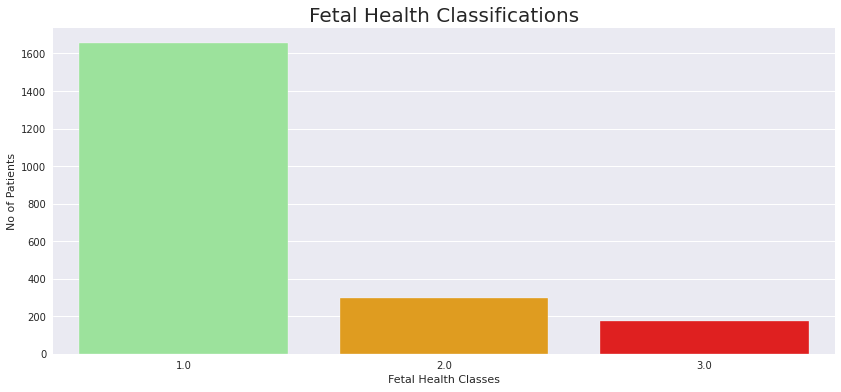

In [17]:
# Lets check the distribution of target variable first.

sns.set_style("darkgrid")
plt.figure(figsize = (14, 6))
sns.countplot(data["fetal_health"], alpha = 1, palette = ["lightgreen", "orange", "red"])
plt.title("Fetal Health Classifications", fontsize = 20)
plt.ylabel("No of Patients")
plt.xlabel("Fetal Health Classes")
plt.show()

**Observation** - In this plot we have shown the distribution of samples that where classified as either (1) Normal, (2) Suspect, (3) Pathological. 

Also there is a significant difference in the sample sizes.  we need to consider class imbalance in our modeling parameters.

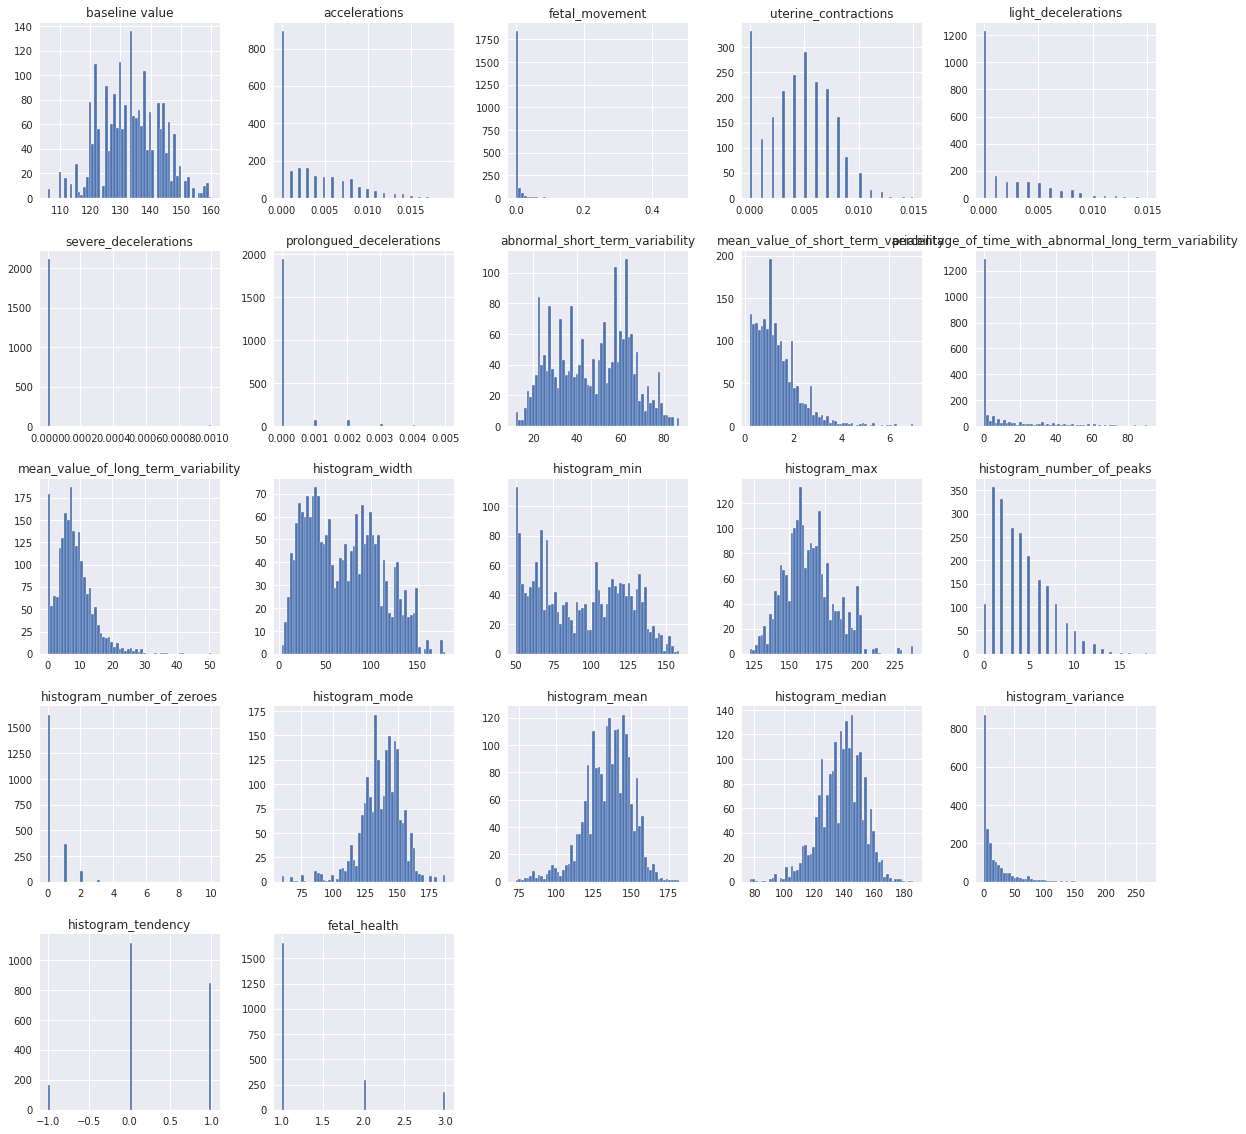

In [18]:
# Check histograms for all features.

data.hist(bins = 60,
          figsize = (20, 20))
plt.show()

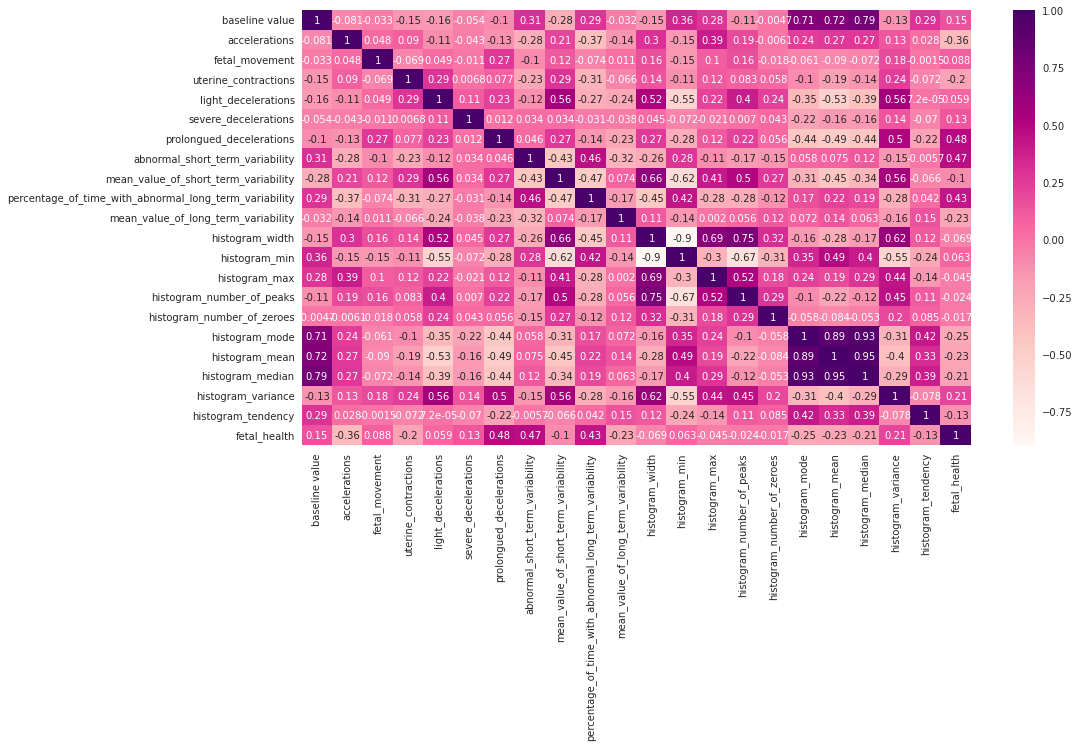

In [19]:
# Check the feature correlation.

corr = data.corr()
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(corr, annot = True, cmap="RdPu");

In [20]:
# To examine the feature dependancy lets create a dataframe for predictor variables.

pred_data = data.drop("fetal_health", axis = 1)

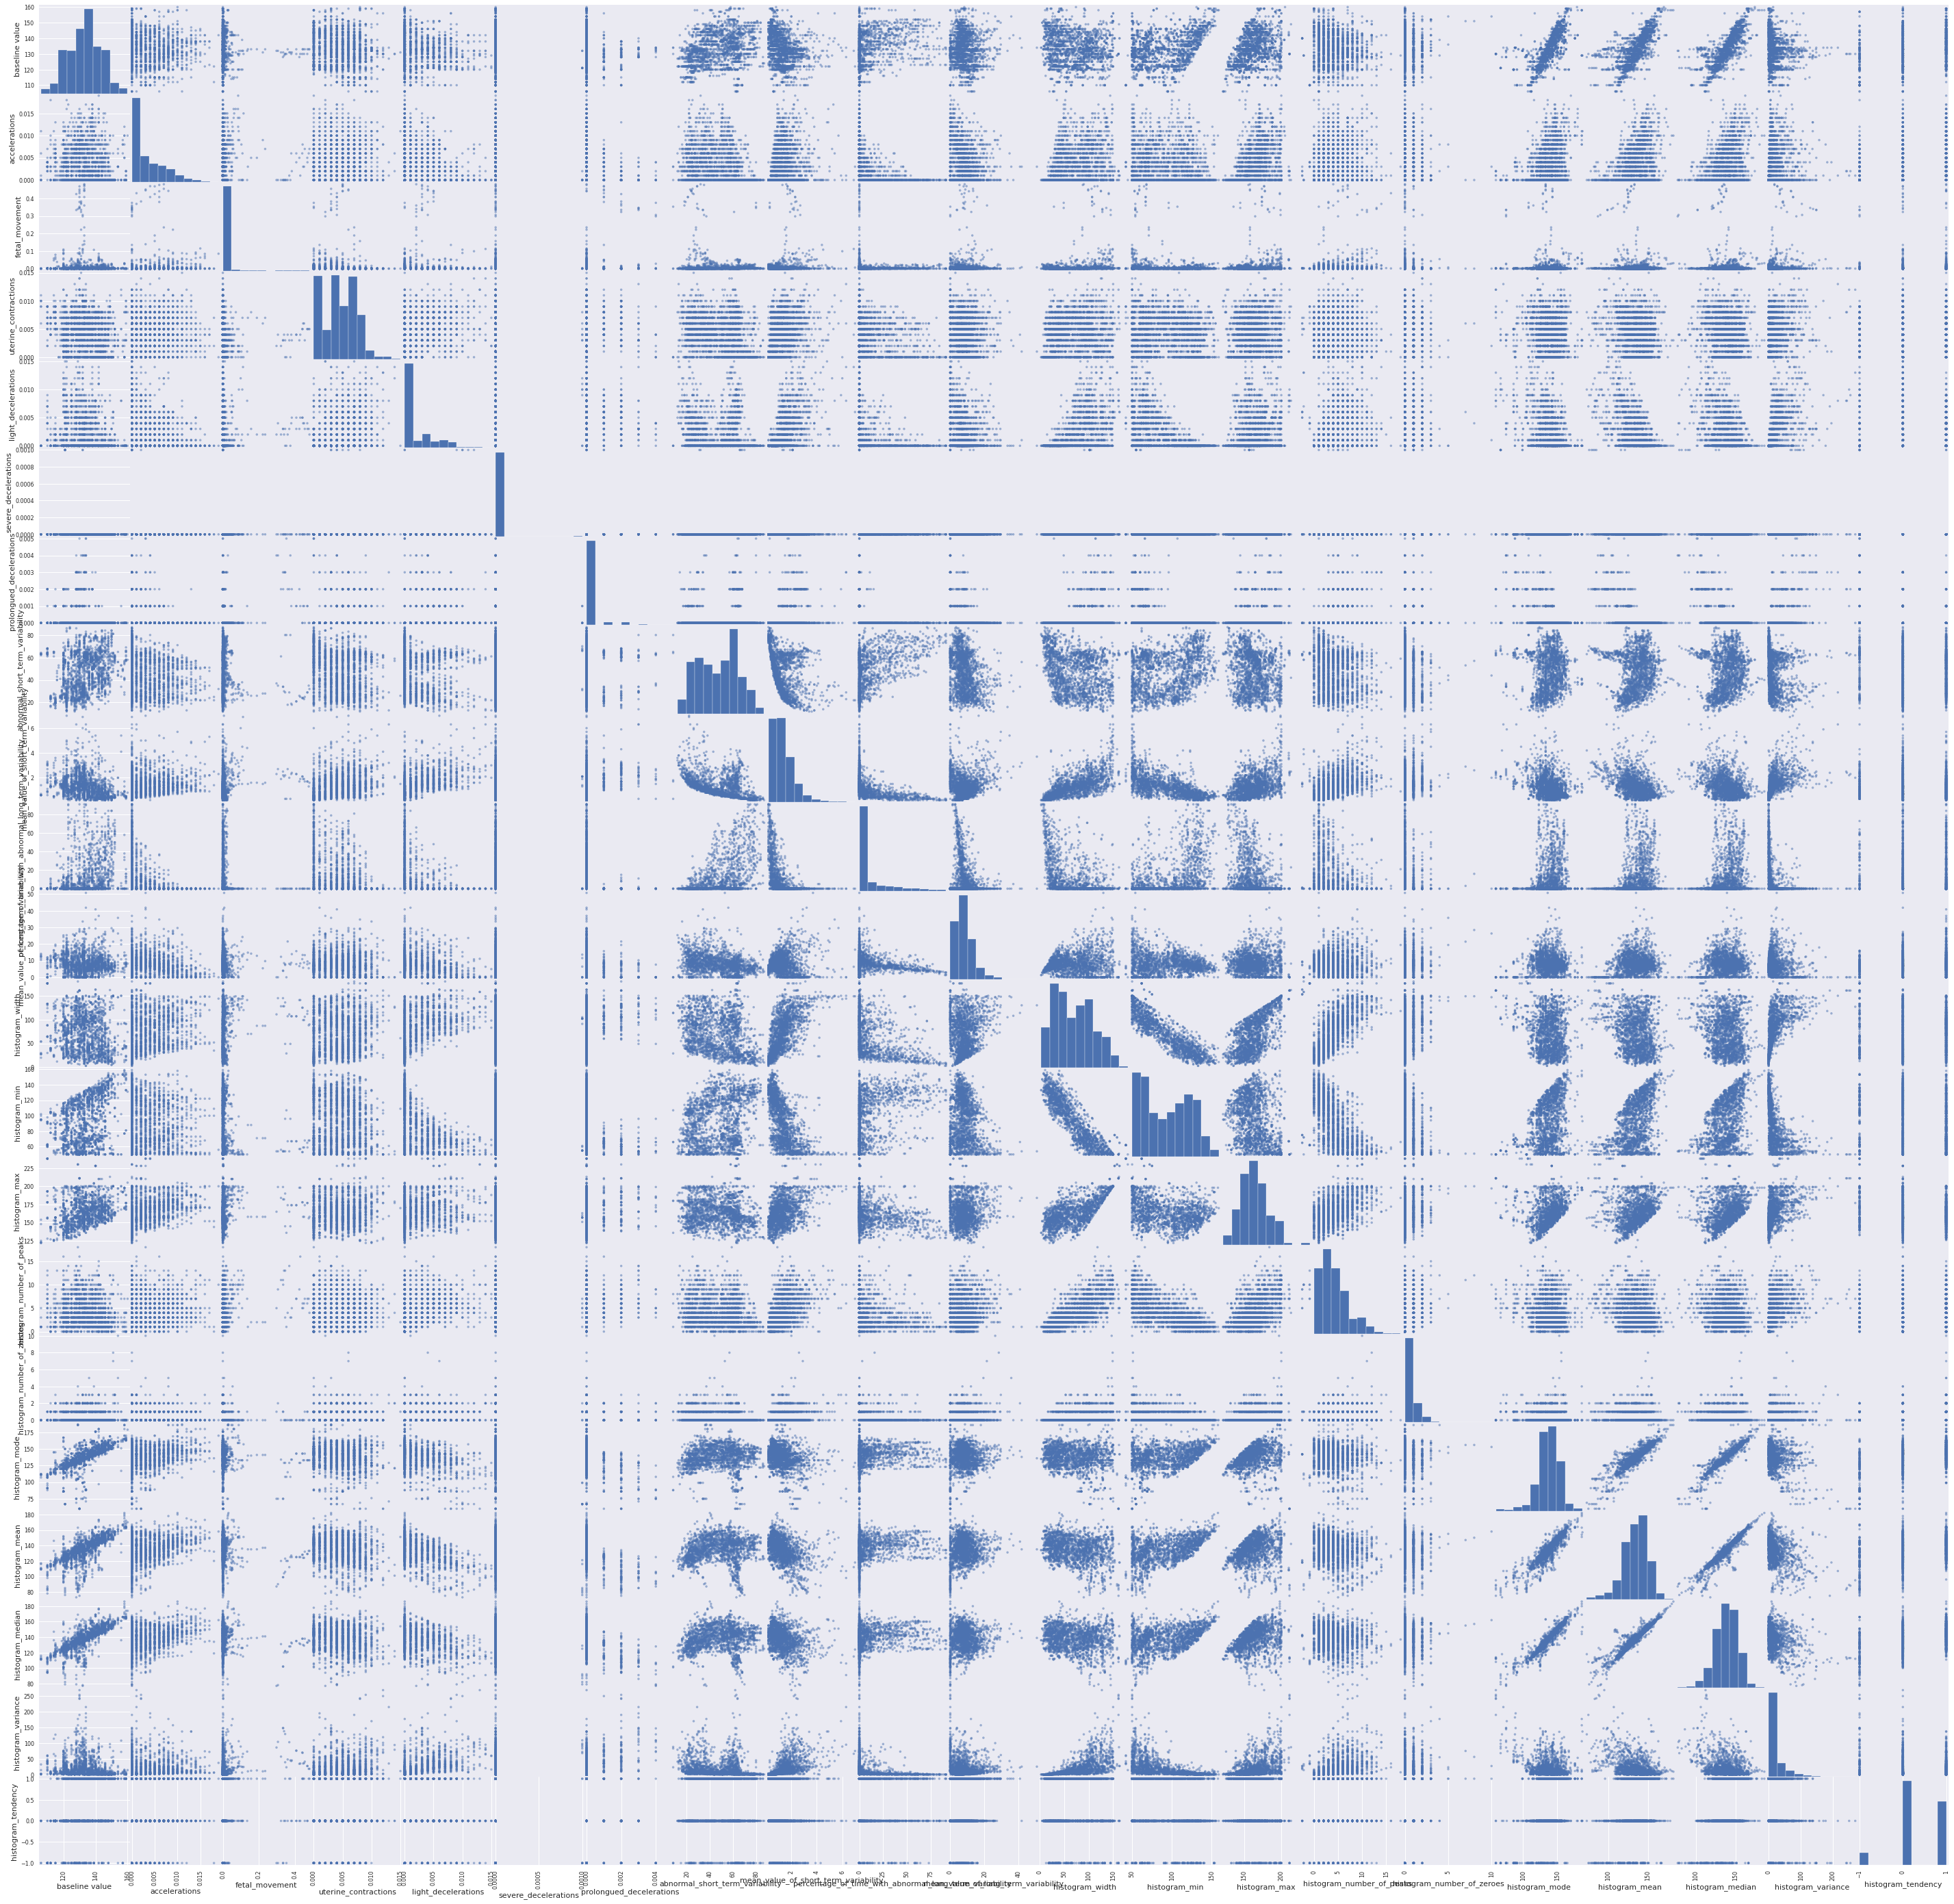

In [21]:
# Now lets plot a scatter plot between the target variable and predictor variables.

pd.plotting.scatter_matrix(pred_data, figsize = (50, 50));
plt.show()

**Observation** - In this plot of the EDA we checked individual features and their interactions with the target variable and other features.  

We were looking any irregularities, outliers and distributions, that we could use to create new features for better classification.  

There are some important features that are useful for our model. lets look into it.

In [22]:
# Check value counts of "uterine_contractions" feature.

data.uterine_contractions.value_counts()

0.000    332
0.005    290
0.004    244
0.006    231
0.007    216
0.003    212
0.008    160
0.002    160
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: uterine_contractions, dtype: int64

In [23]:
# Now Check value counts of "abnormal_short_term_variability" feature.

data.abnormal_short_term_variability.value_counts()

60.0    62
58.0    61
65.0    60
63.0    58
64.0    58
        ..
14.0     4
86.0     4
12.0     2
82.0     2
87.0     1
Name: abnormal_short_term_variability, Length: 75, dtype: int64

**Observation**- We have to take a closer look at the histogram features.  These features where values taken from the histogram of the baseline fetal heart rate and the frequency of changes over time. 

These distribution of FHR changes over time are the same metrics that physicians use for their visual analysis of the CTG.  

Our initial thought was that these histogram values would be the key variables in determining fetal health prediction of class. 

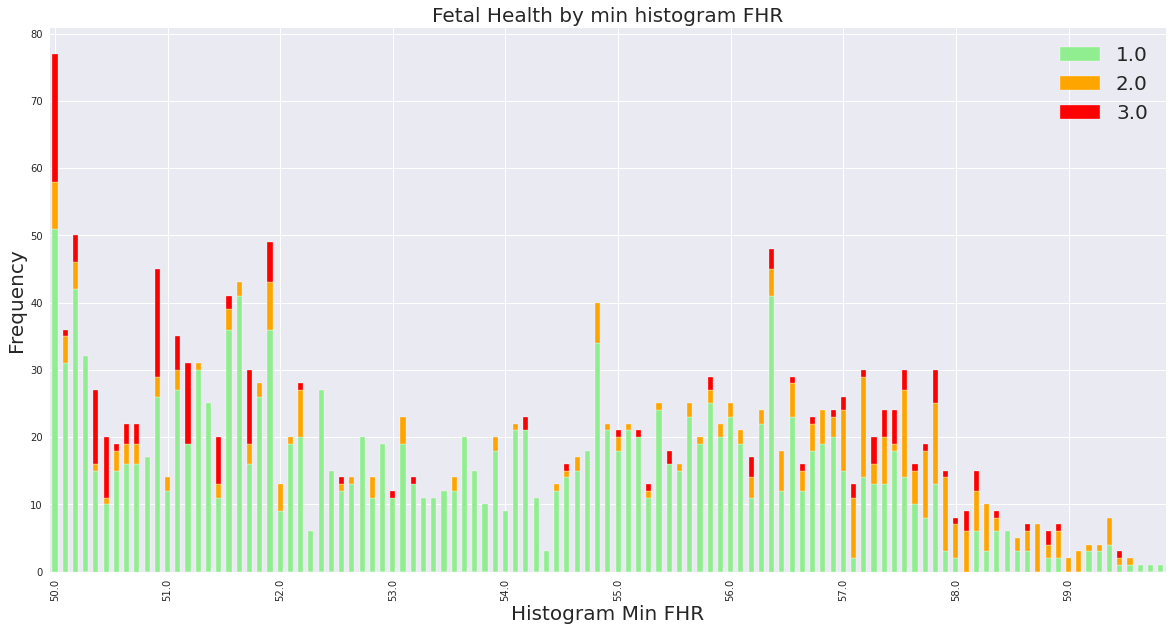

In [24]:
# Plot histogram showing the distrubition values of minimum FHR by the classes.

histogram_min = data.groupby(["histogram_min", "fetal_health"]).histogram_min.count().unstack()
pl = histogram_min.plot(kind = 'bar', 
                   stacked = True,
                   color = ["lightgreen", "orange", "red"],
                   figsize = (20,10))
pl.set_xlabel("Histogram Min FHR", fontsize = 20)
pl.locator_params(axis = "x", nbins = 10)
pl.legend(fontsize = 20)
pl.set_ylabel("Frequency", fontsize = 20)
pl.set_title("Fetal Health by min histogram FHR", fontsize = 20)
plt.show()

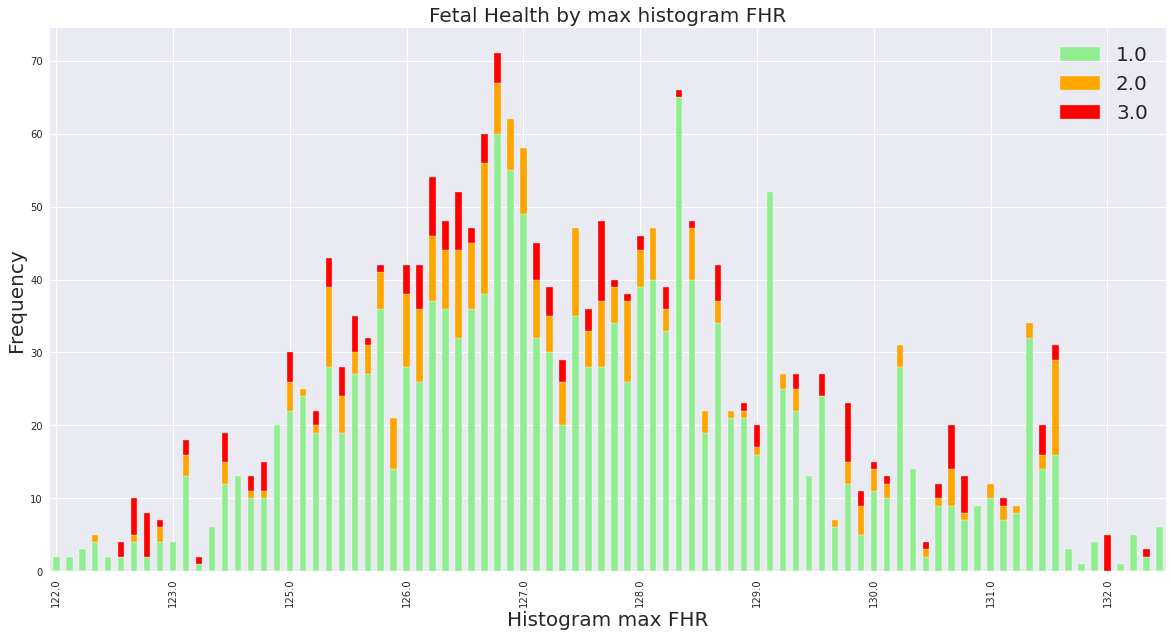

In [25]:
# Plot histogram showing the histogram distribution values of maximum FHR by the classes.

histogram_min = data.groupby(["histogram_max", "fetal_health"]).histogram_max.count().unstack()
pl = histogram_min.plot(kind = "bar", 
                        stacked = True,
                        color = ["lightgreen", "orange", "red"],
                        figsize = (20, 10))
pl.set_xlabel("Histogram max FHR", fontsize = 20)
pl.locator_params(axis = "x", nbins = 10)
pl.legend(fontsize = 20)
pl.set_ylabel("Frequency", fontsize = 20)
pl.set_title("Fetal Health by max histogram FHR", fontsize = 20)
plt.show()

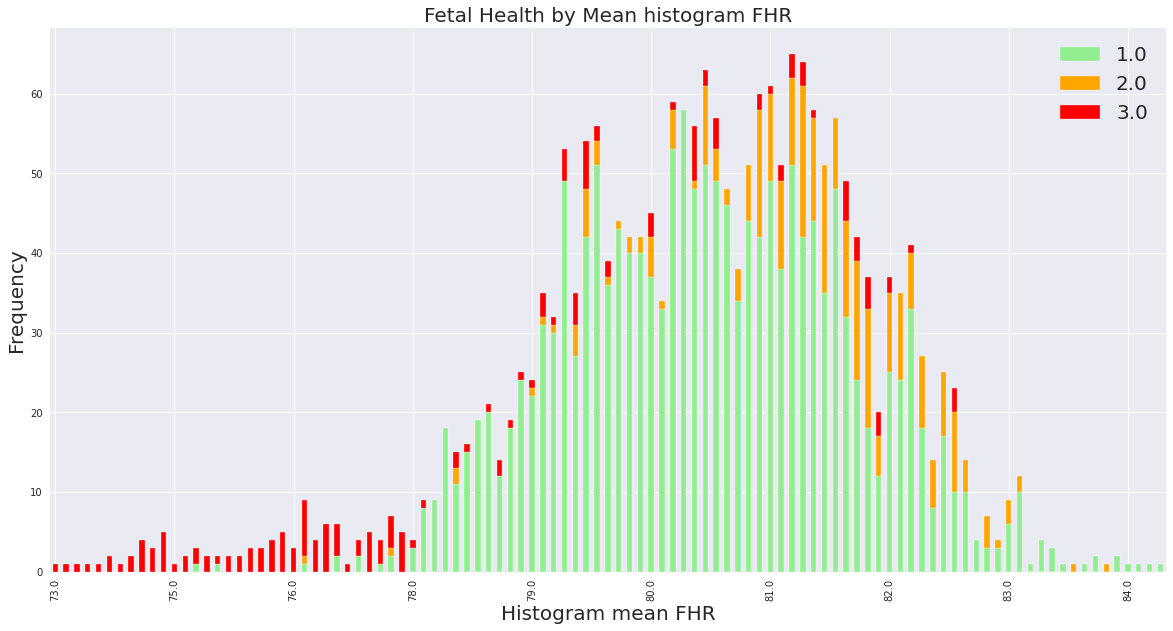

In [26]:
# Plot histogram showing the histogram distribution values of average FHR by the classes.

histogram_min = data.groupby(["histogram_mean", "fetal_health"]).histogram_mean.count().unstack()
pl = histogram_min.plot(kind = "bar", 
                        stacked = True,
                        color =["lightgreen", "orange", "red"],
                        figsize = (20, 10))
pl.set_xlabel("Histogram mean FHR", fontsize = 20)
pl.locator_params(axis = "x", nbins = 10)
pl.legend(fontsize = 20)
pl.set_ylabel("Frequency", fontsize = 20)
pl.set_title('Fetal Health by Mean histogram FHR', fontsize = 20)
plt.show()

**Observation** - In the above plots we can see the distribution of the two classes for the feature values.  

In the histogram min, you can see a clear section of the distribution only covered by our suspect and pathological class.

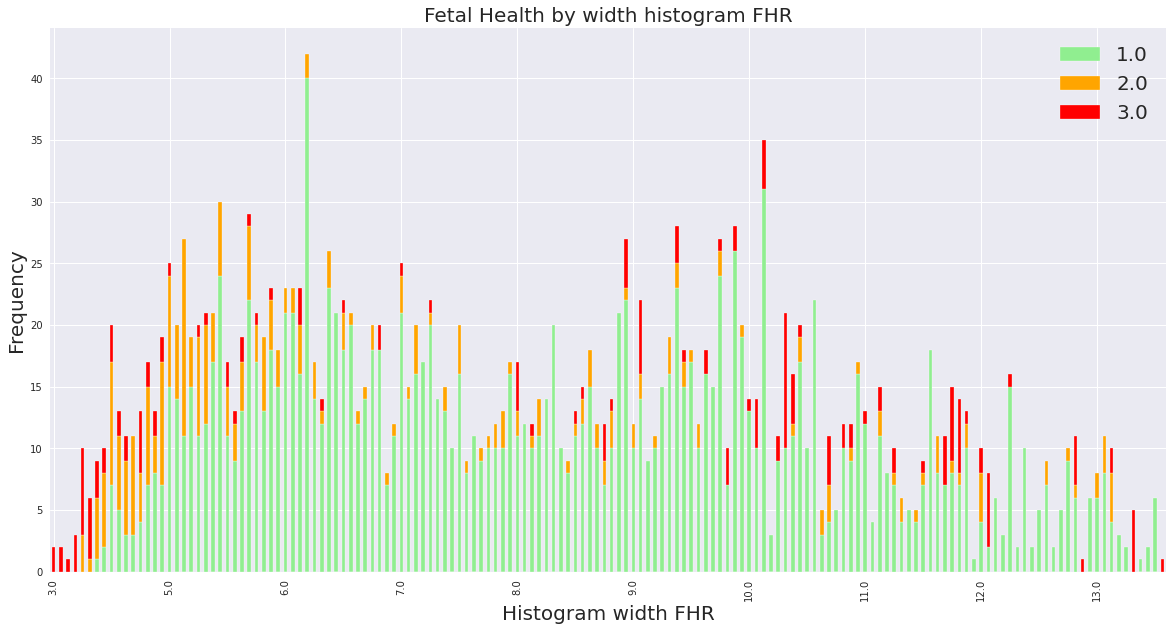

In [27]:
# Plot histogram showing the histogram mean values of average FHR by the classes.

histogram_min = data.groupby(["histogram_width", "fetal_health"]).histogram_width.count().unstack()
pl = histogram_min.plot(kind = "bar", 
                        stacked = True,
                        color =["lightgreen", "orange", "red"],
                        figsize = (20, 10))
pl.set_xlabel("Histogram width FHR", fontsize = 20)
pl.locator_params(axis = "x",nbins = 10)
pl.legend(fontsize = 20)
pl.set_ylabel("Frequency", fontsize = 20)
pl.set_title("Fetal Health by width histogram FHR", fontsize = 20)
plt.show()

**Observation** - Now we have to take a look at severe decelerations(Decelerations are temporary decreases in the fetal heart rate (FHR) during labor). We knew that any major changes of FHR when visually monitered results in immediate surgical intervention.  

The severe deceleration feature was almost synonymous with the suspect,pathological class, however of the 2126 instances in the dataset, there are only 7 instances of severe deceleration.  We suspect this is a key feature in classification, but there may not be enough data here to train the model due to class imbalance.  

we have to preform another analysis creating multiple classes of fetal distress, we hypothesis these extreme changes in fetal heart rate will play a role in classifying pathological fetal health.

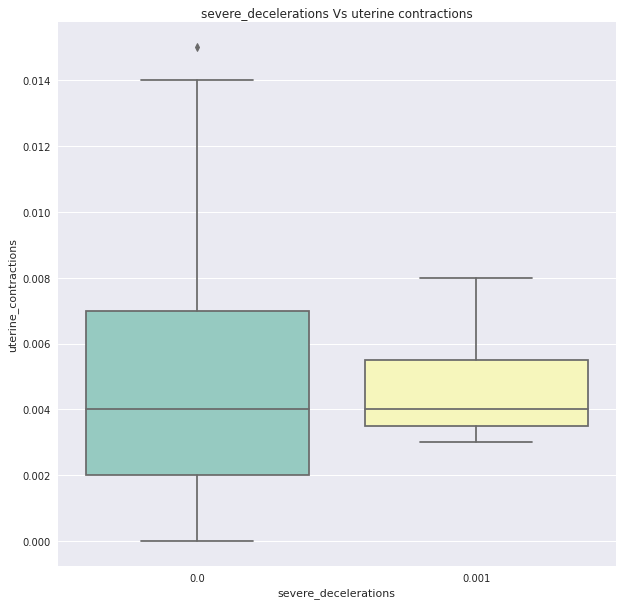

In [28]:
# Plot boxplot of uterine_contractions over per sever deceleration of FHR.

plt.figure(figsize = (10, 10))
sns.boxplot(x = "severe_decelerations", 
            y = "uterine_contractions",
            data = data, 
            palette = "Set3").set_title("severe_decelerations Vs uterine contractions")
plt.show()

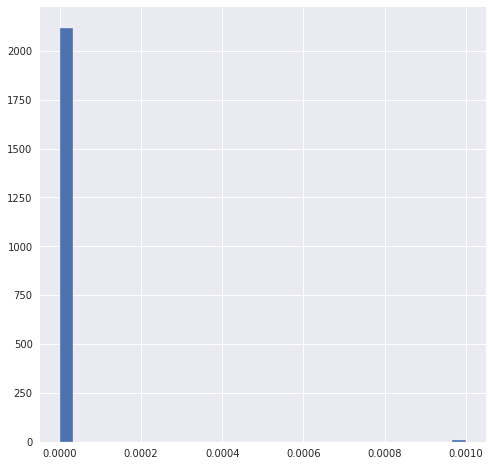

In [29]:
# Now plot histogram for showing the distribution of severe_deceleration in the dataset.

data.severe_decelerations.hist(bins = 30,
                               figsize = (8, 8))
plt.show()

In [30]:
# Lets check the value counts for severe_deceleration feature to verify.

data.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

From 2126 instances in the dataset, there are only 7 instances of severe deceleration. 

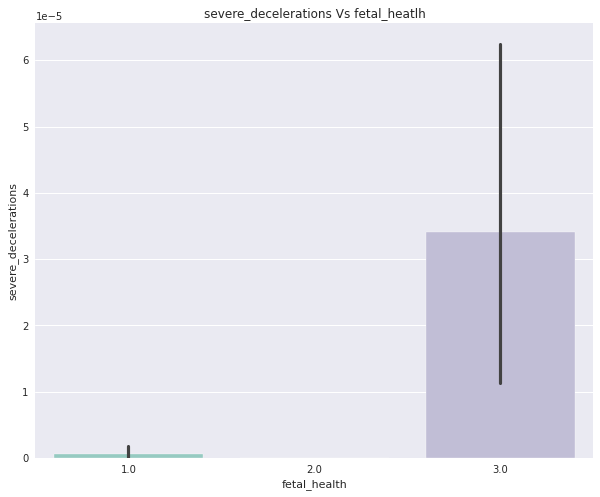

In [31]:
# Now plot the boxplot between fetal_health and sever_deceleration.

plt.figure(figsize = (10, 8))
sns.barplot(x = "fetal_health", 
            y = "severe_decelerations",
            data = data, 
            palette = "Set3").set_title("severe_decelerations Vs fetal_heatlh")
plt.show()

## Step 5 : Feature Engineering.

Since the contraction is make to much importance in fetal health. we need to create a feature for it.

In [32]:
# Create new column for contractions per min using "uterine_contractions" variable.

data["uterine_contraction_per_min"] = data["uterine_contractions"] * 60
data["uterine_contraction_per_min"].head()

0    0.00
1    0.36
2    0.48
3    0.48
4    0.48
Name: uterine_contraction_per_min, dtype: float64

Now lets see the "accelerations" feature.
Accelerations are short-term increases in fetal heart rate by at least 15 beats per minute (bpm) that last at least 15 seconds. These accelerations occur at different times throughout labor and delivery and are a sign that the fetus has an adequate supply of oxygen.

We need to analyse this feature also.

In [33]:
# Check value counts of "acceleration" variable.

data.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

In [34]:
# Get statistical data for "acceleration".

data.accelerations.describe(include = "catagory")

count    2126.000000
mean        0.003178
std         0.003866
min         0.000000
25%         0.000000
50%         0.002000
75%         0.006000
max         0.019000
Name: accelerations, dtype: float64

In [35]:
# Lets bin the "acceleration" values using quantile.

data["quantile_wise_acceleration"] = pd.qcut(data["accelerations"],
                                     q = [0, .25, .75, 1], 
                                     labels = False,
                                     duplicates = "drop")
data["quantile_wise_acceleration"].head()

0    0
1    0
2    0
3    0
4    1
Name: quantile_wise_acceleration, dtype: int64

In [36]:
# Get value_counts from "quantile_wise_acceleration" feature

data.quantile_wise_acceleration.value_counts()

0    1697
1     429
Name: quantile_wise_acceleration, dtype: int64

We have another feature similar to acceleration which is "light_decelerations" which plays important role for defining the fetal health. 

Lets analyze this feature

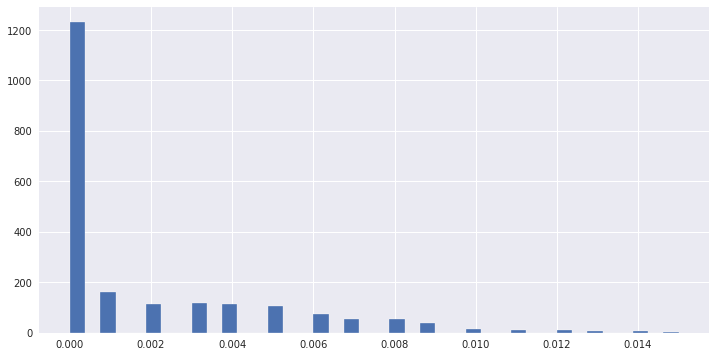

In [37]:
# Plot graph showing distribution of FHR accelerations using "light_decelerations".

data.light_decelerations.hist(bins = 40,
                              figsize = (12, 6))

In [38]:
# Get value counts for "light_decelerations".

data.light_decelerations.value_counts()

0.000    1231
0.001     163
0.003     118
0.002     115
0.004     114
0.005     107
0.006      74
0.008      55
0.007      54
0.009      37
0.010      15
0.011      13
0.012      12
0.013       8
0.014       7
0.015       3
Name: light_decelerations, dtype: int64

In [39]:
# Lets bin the "light_decelerations" values using quantile.

data["quantile_light_decelerations"] = pd.qcut(data["light_decelerations"],
                                     q = 4,
                                     labels = False, 
                                     duplicates = "drop")

In [40]:
data["quantile_light_decelerations"].head()

0    0
1    0
2    0
3    0
4    0
Name: quantile_light_decelerations, dtype: int64

In [41]:
# Get value counts for "light_decelerations".

data.quantile_light_decelerations.value_counts()

0    1627
1     499
Name: quantile_light_decelerations, dtype: int64

**Observation** In above code snippet we binned several continuous variable to create discrete variables.  

Our goal is to create catagories within the continuous features to observe if these catagories where class specific.  

Lets create another feature which combines the values of other important variable. Many on these features has zero values.

In [42]:
# Create new column of all changes to the the baseline squared.

data["root_total_change"] = (data.accelerations + 
                             data.fetal_movement + 
                             data.uterine_contractions + 
                             data.light_decelerations + 
                             data.severe_decelerations + 
                             data.prolongued_decelerations)**.5

data["root_total_change"].head()

0    0.000000
1    0.122474
2    0.118322
3    0.118322
4    0.122474
Name: root_total_change, dtype: float64

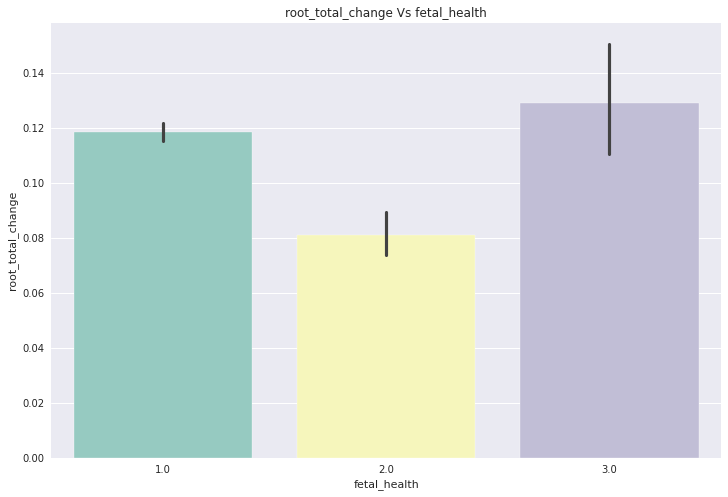

In [43]:
# Lets plot a barplot of the root_total_change Vs fetal_health

plt.figure(figsize = (12, 8))

sns.barplot(x = "fetal_health", 
            y = "root_total_change",
            data = data, 
            palette = "Set3").set_title("root_total_change Vs fetal_health")
plt.show()

#### We need to create some dummy variables for sime features from dataset.

In [44]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health', 'uterine_contraction_per_min',
       'quantile_wise_acceleration', 'quantile_light_decelerations',
       'root_total_change'],
      dtype='object')

In [45]:
# Create dummy variables.

histogram_number_of_zeroes_dummie = pd.get_dummies(data.histogram_number_of_zeroes, prefix = "hist_zeros", drop_first = True)
histogram_tendency_dummie = pd.get_dummies(data.histogram_tendency,prefix = "hist_tendancy", drop_first = True)
severe_decelerations_dummie = pd.get_dummies(data.severe_decelerations,prefix = "sev_decel", drop_first = True)
quantile_wise_acceleration_dummie = pd.get_dummies(data.quantile_wise_acceleration, prefix = "quant_acc", drop_first = True)
quantile_light_decelerations_dummie = pd.get_dummies(data.quantile_light_decelerations, prefix = "quant_light_dec", drop_first = True)

In [46]:
dummie_data = pd.concat([histogram_number_of_zeroes_dummie,
                         histogram_tendency_dummie,
                         severe_decelerations_dummie,
                         quantile_wise_acceleration_dummie,
                         quantile_light_decelerations_dummie],
                         axis = 1)
dummie_data.head()

hist_zeros_1.0  hist_zeros_2.0  hist_zeros_3.0  hist_zeros_4.0  \
0               0               0               0               0   
1               1               0               0               0   
2               1               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   hist_zeros_5.0  hist_zeros_7.0  hist_zeros_8.0  hist_zeros_10.0  \
0               0               0               0                0   
1               0               0               0                0   
2               0               0               0                0   
3               0               0               0                0   
4               0               0               0                0   

   hist_tendancy_0.0  hist_tendancy_1.0  sev_decel_0.001  quant_acc_1  \
0                  0                  1                0            0   
1                  1                  0                0            0   
2                  1                  0                0            0   
3                  0                  1                0            0   
4                  0                  1                0            1   

   quant_light_dec_1  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [47]:
# Create copy of original dataframe.

data_new = data
data_new.head() 

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  uterine_contraction_per_min  \
0                 1.0           2.0                         0.00   
1                 0.0           1.0                         0.36   
2                 0.0           1.0                         0.48   
3                 1.0           1.0                         0.48   
4                 1.0           1.0                         0.48   

   quantile_wise_acceleration  quantile_light_decelerations  root_total_change  
0                           0                             0           0.000000  
1                           0                             0           0.122474  
2                           0                             0           0.118322  
3                           0                             0           0.118322  
4                           1                             0           0.122474

In [48]:
# Now drop the features that where dummied above.
data_new = data_new.drop(["histogram_number_of_zeroes",
                          "histogram_tendency",
                          "severe_decelerations",
                          "quantile_wise_acceleration",
                          "quantile_light_decelerations"],
                         axis = 1)

In [49]:
#Concat the new dataframe with new features after dummyfication.

data_features = pd.concat([data_new, dummie_data], axis = 1)
data_features.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  prolongued_decelerations  \
0                0.000                       0.0   
1                0.003                       0.0   
2                0.003                       0.0   
3                0.003                       0.0   
4                0.000                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_mode  histogram_mean  \
0          126.0                        2.0           120.0           137.0   
1          198.0                        6.0           141.0           136.0   
2          198.0                        5.0           141.0           135.0   
3          170.0                       11.0           137.0           134.0   
4          170.0                        9.0           137.0           136.0   

   histogram_median  histogram_variance  fetal_health  \
0             121.0                73.0           2.0   
1             140.0                12.0           1.0   
2             138.0                13.0           1.0   
3             137.0                13.0           1.0   
4             138.0                11.0           1.0   

   uterine_contraction_per_min  root_total_change  hist_zeros_1.0  \
0                         0.00           0.000000               0   
1                         0.36           0.122474               1   
2                         0.48           0.118322               1   
3                         0.48           0.118322               0   
4                         0.48           0.122474               0   

   hist_zeros_2.0  hist_zeros_3.0  hist_zeros_4.0  hist_zeros_5.0  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   hist_zeros_7.0  hist_zeros_8.0  hist_zeros_10.0  hist_tendancy_0.0  \
0               0               0                0                  0   
1               0               0                0                  1   
2               0               0                0                  1   
3               0               0   

In [50]:
data_features.shape

(2126, 34)

In [51]:
# Since our target variable has 3 different classes but the "suspect" class doenst provide any perticular data.
# So we will convert the target variable into binary class.

# Change any value of the target value above one to two, creating two target classes instead of three classes. 

data_features.fetal_health = np.where(data_features.fetal_health > 1.0, 2.0, 
                                      data_features.fetal_health)

## Step 6 : Train Test Split.

In [52]:
# Assign our feature variables and target variable into the X and y variables. 
# Split our dataset using Sklearn Train Test Split. 
# We will use the Sklearn default option and assign 75% to our train set and 25% to our test set.


# Assigning features variables (X) and target variable (y)
X = data_features.drop("fetal_health", axis = 1)
y = data_features.fetal_health


# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [53]:
# Check if train test split ran correclty.

for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(y), 2))

0.75
0.25


In [54]:
# Standared scaler for predicting features.

scaler = StandardScaler()  
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

### 6.1 : Handle The Class Imbalance.

To handle class imbalance we oversampled the minority class using SMOTE(Synthetic Minority Oversampling Technique), this balanced the minority class by sampling the nearest neighboors and adding points between the neighbors.  

We used both a SMOTE sampled database and unbalanced database to compare the effect of the metrics for each experimental baseline model.  

The Smote Database preformed better on every baseline model, we chose to use the SMOTE database for our final models.  

In [55]:
# Used smote to oversample minority class

sm = SMOTE(random_state = 25)
smX_train, smy_train = sm.fit_resample(X_train, y_train)

### Defining some evaluation function for model results.

In [56]:
# Evaluation function.

def evaluation(y_true, y_pred):
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_true, y_pred).ravel())

In [57]:
# Function Prints best parameters for GridSearchCV

def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))   

### 6.2 : Logistic Regression.

In [58]:
# Fit train set with Logistic Regression model.

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [59]:
# Get evaluation metrics and confusion matrix.
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.8759398496240601
Recall: 0.9462102689486552
F1 Score: 0.9214285714285714
Precision: 0.8979118329466357

Confusion Matrix:
 TN,  FP, FN, TP
[387  22  44  79]


In [60]:
smlr = LogisticRegression(solver = "liblinear")
smlr.fit(smX_train,smy_train)
y_predsm = smlr.predict(X_test)

In [61]:
evaluation(y_test, y_predsm)

Evaluation Metrics:
Accuracy: 0.8778195488721805
Recall: 0.8801955990220048
F1 Score: 0.9171974522292994
Precision: 0.9574468085106383

Confusion Matrix:
 TN,  FP, FN, TP
[360  49  16 107]


In [62]:
# Now lets create a table which will compare the logistic regression coefficients and comparing the coefficients of the SMOTE and inbalanced dataset.

coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns), "Coefficients", lr.coef_.transpose())

coef_table_2 = pd.DataFrame(list(smX_train.columns)).copy()
coef_table_2.insert(len(coef_table_2.columns), "SMOTE Coefficients", smlr.coef_.transpose())

smote_vs_coef = pd.concat([coef_table, coef_table_2], axis = 1)
smote_vs_coef.columns = ["Features", "Coefficients", "del", "SMOTE Coefficients"]
del smote_vs_coef['del']

smote_vs_coef

Features  Coefficients  \
0                                      baseline value      0.103090   
1                                       accelerations     -0.006996   
2                                      fetal_movement      0.046541   
3                                uterine_contractions     -0.009460   
4                                 light_decelerations     -0.003934   
5                            prolongued_decelerations      0.001453   
6                     abnormal_short_term_variability      0.054180   
7                mean_value_of_short_term_variability     -1.220319   
8   percentage_of_time_with_abnormal_long_term_var...      0.034830   
9                 mean_value_of_long_term_variability      0.016754   
10                                    histogram_width     -0.010952   
11                                      histogram_min      0.008586   
12                                      histogram_max     -0.002366   
13                          histogram_number_of_peaks      0.264060   
14                                     histogram_mode     -0.034322   
15                                     histogram_mean     -0.054469   
16                                   histogram_median     -0.042857   
17                                 histogram_variance      0.030405   
18                        uterine_contraction_per_min     -0.567588   
19                                  root_total_change     -0.048172   
20                                     hist_zeros_1.0      0.095355   
21                                     hist_zeros_2.0      0.032501   
22                                     hist_zeros_3.0     -0.007721   
23                                     hist_zeros_4.0      0.030555   
24                                     hist_zeros_5.0     -0.003843   
25                                     hist_zeros_7.0      0.000000   
26                                     hist_zeros_8.0      0.019196   
27                                    hist_zeros_10.0     -0.001404   
28                                  hist_tendancy_0.0     -0.134220   
29                                  hist_tendancy_1.0      0.158140   
30                                    sev_decel_0.001     -0.007421   
31                                        quant_acc_1     -0.398330   
32                                  quant_light_dec_1     -0.611774   

    SMOTE Coefficients  
0             0.154072  
1            -0.240045  
2             1.347717  
3            -0.048170  
4             0.003204  
5             0.050279  
6             0.058560  
7            -0.937207  
8             0.031722  
9             0.025973  
10           -0.005238  
11            0.005740  
12            0.000502  
13            0.186595  
14           -0.008406  
15           -0.079454  
16           -0.034305  
17            0.040976  
18           -2.890214  
19           -0.400956  
20           -0.548708  
21           -0.438132  
22           -0.786986  
23            0.107651  
24           -0.334380  
25            0.000000  
26            0.317902  
27           -0.348485  
28           -1.118039  
29           -1.477509  
30           -0.633412  
31           -2.973360  
32           -1.492391

### 6.3 : K-Nearest Neighbor(KNN) 

In [63]:
# KNN with class imbalance

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [64]:
y_pred = knn.predict(X_test)

In [65]:
# Prediction metrics and confusion matrix of base KNN with class imbalance.

evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9210526315789473
Recall: 0.9682151589242054
F1 Score: 0.9496402877697842
Precision: 0.9317647058823529

Confusion Matrix:
 TN,  FP, FN, TP
[396  13  29  94]


In [66]:
# KNN model with Smote oversampled class

smknn = KNeighborsClassifier(n_neighbors = 1)
smknn.fit(smX_train, smy_train)
y_pred = smknn.predict(X_test)

In [67]:
# Prediction metrics and confusion matrix of smote base KNN

evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9191729323308271
Recall: 0.9559902200488998
F1 Score: 0.947878787878788
Precision: 0.9399038461538461

Confusion Matrix:
 TN,  FP, FN, TP
[391  18  25  98]


### 6.4 : Decision Tree

In [68]:
# Train decision tree with train set and predict on the test set

tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

In [69]:
#Evaluation metrics

evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.924812030075188
Recall: 0.9437652811735942
F1 Score: 0.9507389162561578
Precision: 0.9578163771712159

Confusion Matrix:
 TN,  FP, FN, TP
[386  23  17 106]


In [70]:
# Decision tree with smote dataset

smtree = DecisionTreeClassifier()
smtree.fit(smX_train,smy_train)
y_pred = smtree.predict(X_test)

In [71]:
# Evaluation Metrics

evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9304511278195489
Recall: 0.9535452322738386
F1 Score: 0.9547123623011017
Precision: 0.9558823529411765

Confusion Matrix:
 TN,  FP, FN, TP
[390  19  18 105]


In [72]:
# Now lets create a table which will compare the Decision Tree coefficients and comparing the coefficients of the SMOTE and inbalanced dataset.

coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",tree.feature_importances_.transpose())

coef_table_2 = pd.DataFrame(list(smX_train.columns)).copy()
coef_table_2.insert(len(coef_table_2.columns),'sm_Coefs',tree.feature_importances_.transpose())

smote_vs_coef = pd.concat([coef_table,coef_table_2],axis=1)
smote_vs_coef.columns = ['features','importance','del','sm_importance']
del smote_vs_coef['del']
smote_vs_coef

features  importance  \
0                                      baseline value    0.050888   
1                                       accelerations    0.033863   
2                                      fetal_movement    0.004742   
3                                uterine_contractions    0.000000   
4                                 light_decelerations    0.000000   
5                            prolongued_decelerations    0.028585   
6                     abnormal_short_term_variability    0.341082   
7                mean_value_of_short_term_variability    0.115917   
8   percentage_of_time_with_abnormal_long_term_var...    0.044652   
9                 mean_value_of_long_term_variability    0.018986   
10                                    histogram_width    0.015668   
11                                      histogram_min    0.038516   
12                                      histogram_max    0.037546   
13                          histogram_number_of_peaks    0.016062   
14                                     histogram_mode    0.020438   
15                                     histogram_mean    0.173347   
16                                   histogram_median    0.006727   
17                                 histogram_variance    0.006461   
18                        uterine_contraction_per_min    0.027980   
19                                  root_total_change    0.014927   
20                                     hist_zeros_1.0    0.000000   
21                                     hist_zeros_2.0    0.000000   
22                                     hist_zeros_3.0    0.000000   
23                                     hist_zeros_4.0    0.003614   
24                                     hist_zeros_5.0    0.000000   
25                                     hist_zeros_7.0    0.000000   
26                                     hist_zeros_8.0    0.000000   
27                                    hist_zeros_10.0    0.000000   
28                                  hist_tendancy_0.0    0.000000   
29                                  hist_tendancy_1.0    0.000000   
30                                    sev_decel_0.001    0.000000   
31                                        quant_acc_1    0.000000   
32                                  quant_light_dec_1    0.000000   

    sm_importance  
0        0.050888  
1        0.033863  
2        0.004742  
3        0.000000  
4        0.000000  
5        0.028585  
6        0.341082  
7        0.115917  
8        0.044652  
9        0.018986  
10       0.015668  
11       0.038516  
12       0.037546  
13       0.016062  
14       0.020438  
15       0.173347  
16       0.006727  
17       0.006461  
18       0.027980  
19       0.014927  
20       0.000000  
21       0.000000  
22       0.000000  
23       0.003614  
24       0.000000  
25       0.000000  
26       0.000000  
27       0.000000  
28       0.000000  
29       0.000000  
30       0.000000  
31       0.000000  
32       0.000000

### 6.5 Random Forest

In [73]:
# Random Forest classifier
# We will be using 50 estimators and a max depth of 3

rfc = RandomForestClassifier(random_state = 1, n_estimators = 50, max_depth = 3, n_jobs = -1, verbose = 1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


In [74]:
# Evaluation metrics for random forest

evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9022556390977443
Recall: 0.980440097799511
F1 Score: 0.9391100702576113
Precision: 0.9011235955056179

Confusion Matrix:
 TN,  FP, FN, TP
[401   8  44  79]


In [75]:
# Random Forest classifier
# We will be using 50 estimators and a max depth of 3 using SMOTE dataset

smrfc = RandomForestClassifier(random_state =1, n_estimators = 50, max_depth = 3, n_jobs = -1, verbose = 1)
smrfc.fit(smX_train, smy_train)
y_pred = smrfc.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


In [76]:
# Evaluation matrix

evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.8984962406015038
Recall: 0.921760391198044
F1 Score: 0.9331683168316831
Precision: 0.9448621553884712

Confusion Matrix:
 TN,  FP, FN, TP
[377  32  22 101]


In [77]:
# Now lets create a table which will compare the Random Forest coefficients and comparing the coefficients of the SMOTE and inbalanced dataset.

coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",rfc.feature_importances_.transpose())

coef_table_2 = pd.DataFrame(list(smX_train.columns)).copy()
coef_table_2.insert(len(coef_table_2.columns),'sm_Coefs',smrfc.feature_importances_.transpose())

smote_vs_coef = pd.concat([coef_table,coef_table_2],axis=1)
smote_vs_coef.columns = ['features','importance_baseline','del','sm_importance_baseline']
del smote_vs_coef['del']
smote_vs_coef

features  importance_baseline  \
0                                      baseline value             0.002797   
1                                       accelerations             0.110105   
2                                      fetal_movement             0.003803   
3                                uterine_contractions             0.029814   
4                                 light_decelerations             0.006920   
5                            prolongued_decelerations             0.054791   
6                     abnormal_short_term_variability             0.268596   
7                mean_value_of_short_term_variability             0.108041   
8   percentage_of_time_with_abnormal_long_term_var...             0.061992   
9                 mean_value_of_long_term_variability             0.019779   
10                                    histogram_width             0.019114   
11                                      histogram_min             0.040636   
12                                      histogram_max             0.009257   
13                          histogram_number_of_peaks             0.003190   
14                                     histogram_mode             0.033778   
15                                     histogram_mean             0.085028   
16                                   histogram_median             0.045540   
17                                 histogram_variance             0.036823   
18                        uterine_contraction_per_min             0.029198   
19                                  root_total_change             0.022880   
20                                     hist_zeros_1.0             0.000111   
21                                     hist_zeros_2.0             0.000000   
22                                     hist_zeros_3.0             0.000000   
23                                     hist_zeros_4.0             0.001174   
24                                     hist_zeros_5.0             0.000000   
25                                     hist_zeros_7.0             0.000000   
26                                     hist_zeros_8.0             0.000000   
27                                    hist_zeros_10.0             0.000000   
28                                  hist_tendancy_0.0             0.000000   
29                                  hist_tendancy_1.0             0.001339   
30                                    sev_decel_0.001             0.000000   
31                                        quant_acc_1             0.005296   
32                                  quant_light_dec_1             0.000000   

    sm_importance_baseline  
0                 0.006774  
1                 0.199394  
2                 0.003480  
3                 0.029597  
4                 0.000431  
5                 0.037416  
6                 0.253199  
7                 0.104829  
8                 0.050094  
9                 0.013593  
10                0.009065  
11                0.029493  
12                0.006511  
13                0.001794  
14                0.031634  
15                0.065005  
16                0.055724  
17                0.044734  
18                0.023218  
19                0.000931  
20                0.000281  
21                0.000000  
22                0.000000  
23                0.000000  
24                0.000000  
25                0.000000  
26                0.000000  
27                0.000000  
28                0.000428  
29                0.000186  
30                0.000000  
31                0.031784  
32                0.000404

### Grid Search Random Forest

We will run  gridsearch on the random forest to identify what are the best hyperparamters works for the model. 

In [78]:
parameters = {
    "n_estimators": [25, 50, 100, 300, 500],
    "criterion" : ["gini", "entropy"],
    "max_depth" : [8, 9, 10, 11, 12]}

In [79]:
# Gridsearch with Random Forest

grid_tree=GridSearchCV(RandomForestClassifier(), 
                       parameters, 
                       cv = 15, 
                       scoring = "f1", 
                       verbose = 1, 
                       n_jobs = -1)

In [81]:
# Lets fit random forest grid serch to SMOTE train set.

grid_tree.fit(smX_train, smy_train)

Fitting 15 folds for each of 50 candidates, totalling 750 fits


GridSearchCV(cv=15, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                             

In [82]:
# Find the best score, best parameters and best estimator for grid search

print(grid_tree.best_score_)
print("\n")
print(grid_tree.best_params_)
print("\n")
print(grid_tree.best_estimator_)

0.9750137099542674


{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 100}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


In [83]:
# Evaluation metrics for random forest gridsearch best parameters.

y_pred = grid_tree.best_estimator_.predict(X_test)
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9492481203007519
Recall: 0.9755501222493888
F1 Score: 0.9672727272727273
Precision: 0.9591346153846154

Confusion Matrix:
 TN,  FP, FN, TP
[399  10  17 106]


**Observation** : The best parameters for the random forest was a max depth of 11, min weight fraction leave of 0, and 500 estimators.  

The Evaluation metrics where our highest score with the experimental set so far.  

Below we compared feature importance for the three random forest models we ran and then graphed the top ten important features to visualize there importance for fetal health classification.

In [84]:
# Best feature table for random forest gridsearch best parameters.

coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefficients", grid_tree.best_estimator_.feature_importances_.transpose())
coef_table

0  Coefficients
0                                      baseline value      0.030437
1                                       accelerations      0.125773
2                                      fetal_movement      0.018312
3                                uterine_contractions      0.032305
4                                 light_decelerations      0.008902
5                            prolongued_decelerations      0.062291
6                     abnormal_short_term_variability      0.135666
7                mean_value_of_short_term_variability      0.089825
8   percentage_of_time_with_abnormal_long_term_var...      0.066426
9                 mean_value_of_long_term_variability      0.027958
10                                    histogram_width      0.025471
11                                      histogram_min      0.039548
12                                      histogram_max      0.024169
13                          histogram_number_of_peaks      0.017984
14                                     histogram_mode      0.051765
15                                     histogram_mean      0.069770
16                                   histogram_median      0.045670
17                                 histogram_variance      0.036372
18                        uterine_contraction_per_min      0.027289
19                                  root_total_change      0.029843
20                                     hist_zeros_1.0      0.001436
21                                     hist_zeros_2.0      0.000324
22                                     hist_zeros_3.0      0.000463
23                                     hist_zeros_4.0      0.000370
24                                     hist_zeros_5.0      0.000009
25                                     hist_zeros_7.0      0.000000
26                                     hist_zeros_8.0      0.000019
27                                    hist_zeros_10.0      0.000016
28                                  hist_tendancy_0.0      0.003432
29                                  hist_tendancy_1.0      0.003036
30                                    sev_decel_0.001      0.000075
31                                        quant_acc_1      0.022978
32                                  quant_light_dec_1      0.002064

In [85]:
# Lets create a table comparing random forest best features between imbalanced data set, smote and smote with gridsearch best features.

coef_table.columns = ["Features", "Grid Search Importance"]
del coef_table["Features"]
best_features_rfc = pd.concat([smote_vs_coef, coef_table], axis = 1)

In [86]:
# Get the best/impotant features.

best_features_rfc

features  importance_baseline  \
0                                      baseline value             0.002797   
1                                       accelerations             0.110105   
2                                      fetal_movement             0.003803   
3                                uterine_contractions             0.029814   
4                                 light_decelerations             0.006920   
5                            prolongued_decelerations             0.054791   
6                     abnormal_short_term_variability             0.268596   
7                mean_value_of_short_term_variability             0.108041   
8   percentage_of_time_with_abnormal_long_term_var...             0.061992   
9                 mean_value_of_long_term_variability             0.019779   
10                                    histogram_width             0.019114   
11                                      histogram_min             0.040636   
12                                      histogram_max             0.009257   
13                          histogram_number_of_peaks             0.003190   
14                                     histogram_mode             0.033778   
15                                     histogram_mean             0.085028   
16                                   histogram_median             0.045540   
17                                 histogram_variance             0.036823   
18                        uterine_contraction_per_min             0.029198   
19                                  root_total_change             0.022880   
20                                     hist_zeros_1.0             0.000111   
21                                     hist_zeros_2.0             0.000000   
22                                     hist_zeros_3.0             0.000000   
23                                     hist_zeros_4.0             0.001174   
24                                     hist_zeros_5.0             0.000000   
25                                     hist_zeros_7.0             0.000000   
26                                     hist_zeros_8.0             0.000000   
27                                    hist_zeros_10.0             0.000000   
28                                  hist_tendancy_0.0             0.000000   
29                                  hist_tendancy_1.0             0.001339   
30                                    sev_decel_0.001             0.000000   
31                                        quant_acc_1             0.005296   
32                                  quant_light_dec_1             0.000000   

    sm_importance_baseline  Grid Search Importance  
0                 0.006774                0.030437  
1                 0.199394                0.125773  
2                 0.003480                0.018312  
3                 0.029597                0.032305  
4                 0.000431                0.008902  
5                 0.037416                0.062291  
6                 0.253199                0.135666  
7                 0.104829                0.089825  
8                 0.050094                0.066426  
9                 0.013593                0.027958  
10                0.009065                0.025471  
11                0.029493                0.039548  
12                0.006511                0.024169  
13                0.001794                0.017984  
14                0.031634                0.051765  
15                0.065005                0.069770  
16                0.055724                0.045670  
17                0.044734                0.036372  
18                0.023218                0.027289  
19                0.000931                0.029843  
20                0.000281                0.001436  
21                0.000000                0.000324  
22                0.000000                0.000463  
23                0.000000                0.000370  
24                0.000000                0.000009  
25            

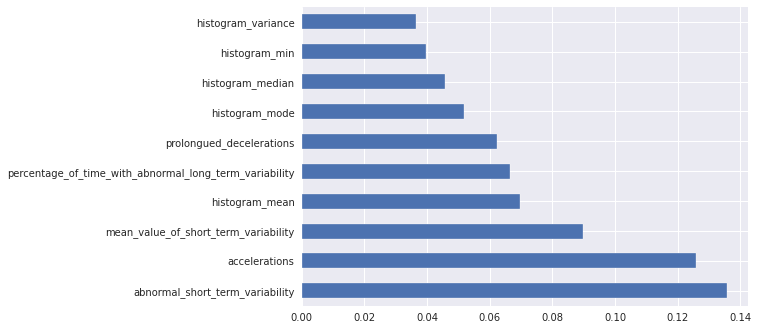

In [87]:
# Lets get the important features from model.

pd.Series(grid_tree.best_estimator_.feature_importances_, index = X.columns).nlargest(10).plot(kind = "barh")
plt.show()

**Observation** : In the Above graph we can see the top ten important features for our grid search random forest model.  

### 6.6 XGBoost

In [88]:
# Try xgboost model.

xgb = XGBClassifier()

In [89]:
# Instantiate XGBClassifier

xg_clf = XGBClassifier(objective = "binary:logistic", 
                           colsample_bytree = 0.75, 
                           subsample = 0.85,
                           learning_rate = 0.1,
                           max_depth = 11, 
                           alpha = 1, 
                           n_estimators = 1000,
                          verbose=1, n_jobs=-1)

In [90]:
# Fitting the model.

xg_clf.fit(smX_train, smy_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.85, verbose=1, verbosity=1)

In [91]:
# Predicting the model.

y_pred = xg_clf.predict(X_test)

In [92]:
# Evaluation Metrics.

evaluation(y_test,y_pred)

Evaluation Metrics:
Accuracy: 0.956766917293233
Recall: 0.9828850855745721
F1 Score: 0.9721886336154776
Precision: 0.9617224880382775

Confusion Matrix:
 TN,  FP, FN, TP
[402   7  16 107]


In [93]:
# Create a comparison table for coefficients comparison.

coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefficients",xg_clf.feature_importances_.transpose())

In [94]:
# Get coefficient table.

coef_table

0  Coefficients
0                                      baseline value      0.016657
1                                       accelerations      0.214756
2                                      fetal_movement      0.023803
3                                uterine_contractions      0.026117
4                                 light_decelerations      0.010362
5                            prolongued_decelerations      0.117575
6                     abnormal_short_term_variability      0.153713
7                mean_value_of_short_term_variability      0.027155
8   percentage_of_time_with_abnormal_long_term_var...      0.017755
9                 mean_value_of_long_term_variability      0.007406
10                                    histogram_width      0.011827
11                                      histogram_min      0.027818
12                                      histogram_max      0.014661
13                          histogram_number_of_peaks      0.012734
14                                     histogram_mode      0.049374
15                                     histogram_mean      0.045006
16                                   histogram_median      0.031999
17                                 histogram_variance      0.019612
18                        uterine_contraction_per_min      0.023477
19                                  root_total_change      0.012380
20                                     hist_zeros_1.0      0.009797
21                                     hist_zeros_2.0      0.000000
22                                     hist_zeros_3.0      0.004459
23                                     hist_zeros_4.0      0.000000
24                                     hist_zeros_5.0      0.000000
25                                     hist_zeros_7.0      0.000000
26                                     hist_zeros_8.0      0.000000
27                                    hist_zeros_10.0      0.000000
28                                  hist_tendancy_0.0      0.004358
29                                  hist_tendancy_1.0      0.010007
30                                    sev_decel_0.001      0.000000
31                                        quant_acc_1      0.057755
32                                  quant_light_dec_1      0.049434

In [95]:
# Parameter grid for xgboost.

clf_xgb = XGBClassifier(objective = "binary:logistic")
param_dist = {"n_estimators" : [500, 1000, 1500],
              "learning_rate" : [0.1, 0.07, 0.05, 0.03, 0.01],
              "max_depth" : [9, 10, 11, 12, 13],
              "colsample_bytree" : [0.5, 0.45, 0.4],
              "min_child_weight" : [1, 2, 3]
             }

In [96]:
# Gridsearch for xgboost.

grid_xg = GridSearchCV(estimator = clf_xgb,
                      param_grid = param_dist,
                      scoring = "f1",
                      n_jobs = -1,
                      verbose = 1,
                      cv = 10)

In [ ]:
# Fit grid search xgboost to train set.

grid_xg.fit(smX_train, smy_train)

In [ ]:
# Get best parameters from model.

grid_xg.best_params_

In [ ]:
# xgboost best estimator test set predictions.

y_pred = grid_xg.best_estimator_.predict(X_test)

In [ ]:
# Get evaluation metrix.

evaluation(y_test,y_pred)

In [ ]:
# Plot feature importance of best estimator grid xgboost..

from xgboost import plot_importance
plot_importance(grid_xg.best_estimator_)

In [ ]:
# Plot top ten key features.

plot_importance(grid_xg.best_estimator_, max_num_features = 10)
plt.show()

**Observation** : The best model overall was our grid search best parameter random forest.  This model had the best precision score of any model we ran in this analysis. 

Key features for the vanilla model where abnormal_short term variatability, acceleration, mean abnormal short term varitability and histogram mean.
